# Q1 Why is it important to sclae the inputs when using SVMs?

### Scaling before applying SVM is very important.  The main advantage of scaling is to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. Another advantage is to avoid numerical difficulties during the calculation. 


### In the following two examples i tried to show the relevance of scaling! In the first iris data, I have tried different normalizer/ scaler such as MinMaxScaler, StandardScaler, but I couldnt find any difference in SVM modeling, However when I use Breast Cancer Data, the effect of scaling before runing SVM model is clearly showed difference. 
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.svm import LinearSVC, SVC
import warnings
from sklearn import svm, datasets
warnings.filterwarnings('ignore')


In [2]:
iris = datasets.load_iris()

In [3]:
X=iris.data[:,:2]
y=iris.target

In [4]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [5]:
model= SVC(kernel='rbf',C=10, gamma= 1)

In [6]:
model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Accuracy before normalized/ scaled

In [7]:
print( "Igris dataset (unnormalized features)")
print('accuracy of rbf-kernel svc on training dataset:{:.2f}'.format(model.score(x_train,y_train)))
print('accuracy of rbf-kernel svc on test set:{:.2f}'.format(model.score(x_test,y_test)))

Igris dataset (unnormalized features)
accuracy of rbf-kernel svc on training dataset:0.84
accuracy of rbf-kernel svc on test set:0.74


In [8]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled = scaler.transform (x_test)
model_scale= SVC (kernel='rbf', C=1, gamma=1 ).fit(x_train_scaled, y_train) 

### Accuracy after normalized/ scaled

In [9]:
print( "Igris dataset (with StandardScaler)")
print('accuracy of rbf-kernel svc(with StanardScaler) on training dataset:{:.2f}'.format(model_scale.score(x_train_scaled,y_train)))
print('accuracy of rbf-kernel svc on test set:{:.2f}'.format(model_scale.score(x_test_scaled,y_test)))

Igris dataset (with StandardScaler)
accuracy of rbf-kernel svc(with StanardScaler) on training dataset:0.83
accuracy of rbf-kernel svc on test set:0.74


the scaling didnt bring any difference, probabliy the data dimention is uniform 

## Breast Cancer data

In [10]:
df= pd.read_csv("C:/Users/user/Desktop/data/data.csv")
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
data_df= list(df.columns[1:31]) 
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
data_df_main = df.loc[:,data_df]

In [11]:
X1 = data_df_main
y1 = df['diagnosis']

In [12]:
from sklearn.cross_validation import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.25, random_state=0)

In [13]:
model1= SVC(kernel='rbf',C=10, gamma=0.1)

In [14]:
model1.fit(x1_train,y1_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
print( "Breast dataset (unnormalized features)")
print('accuracy of rbf-kernel svc on training dataset:{:.2f}'.format(model1.score(x1_train,y1_train)))
print('accuracy of rbf-kernel svc on test set:{:.2f}'.format(model1.score(x1_test,y1_test)))

Breast dataset (unnormalized features)
accuracy of rbf-kernel svc on training dataset:1.00
accuracy of rbf-kernel svc on test set:0.63


Normalized with StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x1_train_scaled= scaler.fit_transform(x1_train)
x1_test_scaled = scaler.transform (x1_test)
model_scale= SVC (kernel='rbf', C=1, gamma=0.1 ).fit(x1_train_scaled, y1_train)

In [17]:
print( "Igris dataset (with StandardScaler)")
print('accuracy of rbf-kernel svc(with StanardScaler) on training dataset:{:.2f}'.format(model_scale.score(x1_train_scaled,y1_train)))
print('accuracy of rbf-kernel svc on test set:{:.2f}'.format(model_scale.score(x1_test_scaled,y1_test)))

Igris dataset (with StandardScaler)
accuracy of rbf-kernel svc(with StanardScaler) on training dataset:0.99
accuracy of rbf-kernel svc on test set:0.95


### Conclusion:  the scaling has made big difference in the breast cancer data, with accurecy improvement from 63% to 95%

## Q2  How can an SVM classifier output a confidence score when it classifies an instance? demonstrate with a block of code.

To extract the confidence score value in SVM, we need to use “predict_proba” function (but here probability=True). This method computes the probability that a given datapoint belongs to a particular class using Platt scaling. Basically, Platt scaling computes the probabilities using the following method:

            P(class/input) = 1 / (1 + exp(A * f(input) + B))
            
Here, P(class/input) is the probability that “input” belongs to “class” and f(input) is the signed distance of the input datapoint from the boundary, which is basically the output of “decision_function”. 

We need to train the SVM as usual and then optimize the parameters A and B. The value of P(class/input) will always be between 0 and 1. 

Bear in mind that the training method would be slightly different if we want to use Platt scaling. We need to train a probability model on top of our SVM.

this is how to do it:


In [18]:
# continuing on the Breast data
classifier_conf = SVC(kernel='linear', probability=True)
classifier_conf.fit(x1_train, y1_train)
classifier_conf.predict_proba(x1_test)
#an array containing probabilities of belonging to the different class

array([[3.51286620e-02, 9.64871338e-01],
       [9.27334156e-01, 7.26658436e-02],
       [9.92357569e-01, 7.64243120e-03],
       [8.31434715e-01, 1.68565285e-01],
       [9.99565073e-01, 4.34927341e-04],
       [9.93101528e-01, 6.89847173e-03],
       [9.82762138e-01, 1.72378616e-02],
       [9.95194222e-01, 4.80577814e-03],
       [9.95316826e-01, 4.68317375e-03],
       [9.99707979e-01, 2.92020763e-04],
       [5.49464414e-01, 4.50535586e-01],
       [7.81340411e-01, 2.18659589e-01],
       [9.97154973e-01, 2.84502719e-03],
       [4.83912414e-01, 5.16087586e-01],
       [6.99789019e-01, 3.00210981e-01],
       [7.48273297e-02, 9.25172670e-01],
       [9.92729393e-01, 7.27060723e-03],
       [3.06995507e-09, 9.99999997e-01],
       [3.00688045e-02, 9.69931195e-01],
       [1.67415785e-13, 1.00000000e+00],
       [5.24383597e-06, 9.99994756e-01],
       [1.51380359e-01, 8.48619641e-01],
       [9.90821294e-01, 9.17870648e-03],
       [9.79325286e-01, 2.06747138e-02],
       [2.217671

In [19]:
decsion_fun= SVC( kernel='linear',probability=False)
decsion_fun.fit(x1_train,y1_train)
decsion_fun.decision_function(x1_test)
# this only shows the distance, doesnt entail the classifiction of instances

array([ 3.24522217, -1.87823976, -3.91349836, -1.04691951, -6.42035414,
       -4.00310844, -3.20117439, -4.31933275, -4.34193771, -6.76871981,
        0.1749075 , -0.76503293, -4.77785698,  0.40494655, -0.39143941,
        2.54638192, -3.95713914,  9.39995595,  3.3859479 , 13.6923475 ,
        6.14595601,  1.85538227, -3.75320361, -3.04164707,  1.44643465,
       -3.45986745, -4.8285515 ,  1.95266628, -3.55657583, 11.96929301,
       -5.39538643,  6.80009212, -0.11961875,  4.33092953, -6.82349431,
        4.10350051, -1.66121007,  6.35366529, -2.91542738,  5.09186682,
        1.91468812, -5.32424647,  3.29695113, -5.39333714,  2.01284119,
       13.5968553 , -7.23776246, -1.98139053, -4.71395229,  5.74735316,
        7.43926144,  1.34762089,  7.10880027, -3.60062345, -2.84232707,
       -4.78640613, -2.79068991, -2.73078941, -2.66920006, 18.9729345 ,
        3.09778511,  5.41946146, -4.63620524, -3.41977365,  9.57256665,
       -1.49029907, 22.05926562,  8.02187537,  9.35364186, -4.17

## Q3. If you train an SVM classifier with an RBF Kernel and you find out that it underfits the training set. Should you increase/ decrease the gamma? What about C? write a code to prove your statement.

I will decrease gamma, because, when the value of gamma is higher, it will try to find the exact fit as per training data set i.e. generalization error and cause over-fitting problem.

For the penality parameter C, as it controls the trade off between smooth decision boundary and classifying the training points correctly, it should be adjusted by looking at the cross validatio score.

I used the iris data to prove the above statement. 



gamma options: [0.6293706293706294]
gamma options: [0.6293706293706294, 0.6293706293706294]
gamma options: [0.6293706293706294, 0.6293706293706294, 0.6293706293706294]
gamma options: [0.6293706293706294, 0.6293706293706294, 0.6293706293706294, 0.6293706293706294]


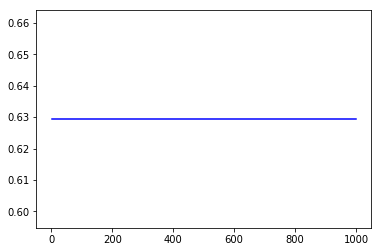

In [20]:
results=[]
gamma_options = [ 1, 10, 100, 1000] 
for gamma in gamma_options: 
    model= SVC(kernel='rbf',C=1000, gamma= gamma)
    model1.fit(x1_train,y1_train)
    results.append(model1.score(x1_test,y1_test))
    print("gamma options:", results)

pd.Series(results,gamma_options).plot(color="blue")

In [21]:
results1=[]
C_options = [ 1, 10, 100, 1000]   
for C in C_options: 
    model1= SVC(kernel='rbf',C=C, gamma=1).fit(x1_train,y1_train)
    results1.append(model1.score(x1_test,y1_test))
    print("C options:",results1)

C options: [0.6293706293706294]
C options: [0.6293706293706294, 0.6293706293706294]
C options: [0.6293706293706294, 0.6293706293706294, 0.6293706293706294]
C options: [0.6293706293706294, 0.6293706293706294, 0.6293706293706294, 0.6293706293706294]


In [22]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

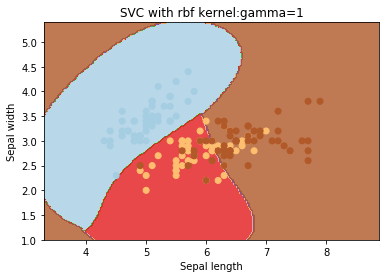

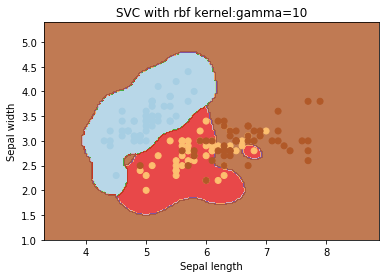

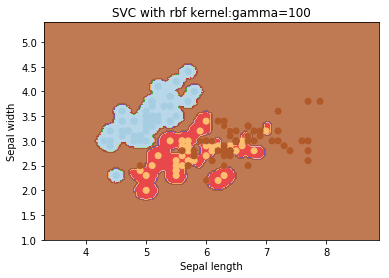

In [23]:
svc1 = svm.SVC(kernel='rbf', C=1,gamma= 1).fit(X, y)
svc2 = svm.SVC(kernel='rbf', C=1,gamma= 10).fit(X, y)
svc3 = svm.SVC(kernel='rbf', C=1,gamma= 100).fit(X, y)
plt.subplot(1, 1, 1)
Z1 = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
Z3 = svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)
plt.contourf(xx, yy, Z1, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel:gamma=1')
plt.show()
plt.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel:gamma=10')
plt.show()
plt.contourf(xx, yy, Z3, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel:gamma=100')
plt.show()

when gamma value increases, the problem of overfitting exhibited very much

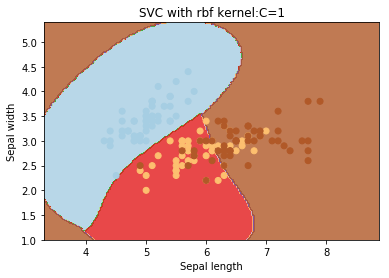

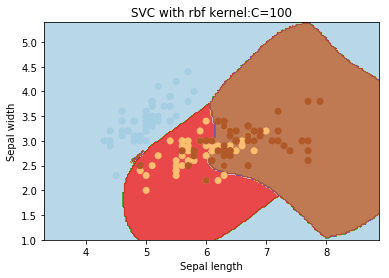

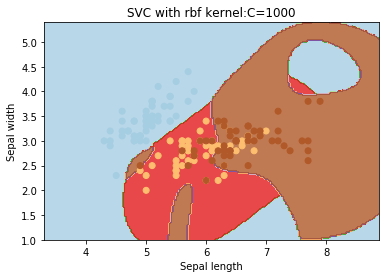

In [24]:
svc1 = svm.SVC(kernel='rbf', C=1,gamma= 1).fit(X, y)
svc2 = svm.SVC(kernel='rbf', C=100,gamma= 1).fit(X, y)
svc3 = svm.SVC(kernel='rbf', C=1000,gamma= 1).fit(X, y)
plt.subplot(1, 1, 1)
Z1 = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
Z3 = svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)
plt.contourf(xx, yy, Z1, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel:C=1')
plt.show()
plt.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel:C=100')
plt.show()
plt.contourf(xx, yy, Z3, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel:C=1000')
plt.show()

using cross validation it is possible to assess the proper C value, in my assessment of this data exterim ends are not advisible